In [2]:
import numpy as np
import mne
import matplotlib.pyplot as plt
from scipy import signal


# welch with reshaped data

In [9]:
data=np.load('D:/Datasets/EEG dataset/mental artithematic/preprocessed_data/subject_2/subject_2_{}.npy'.format(1)).T
#data should be column into samples

In [10]:
data=data.reshape(18,-1,3000)

In [11]:
data=np.swapaxes(data,0,1) #trials, channel, datapoints

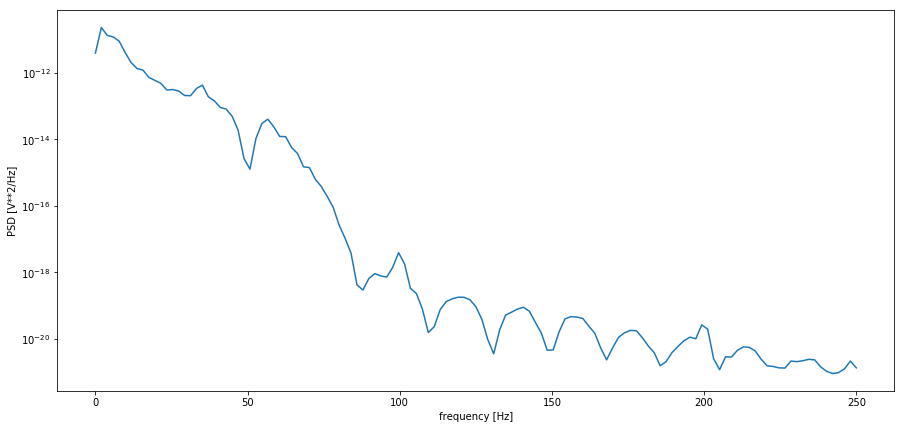

In [12]:
plt.figure(figsize=(15,7))
f, Pxx_den = signal.welch(data, fs=500)
plt.semilogy(f, Pxx_den[0,0,:])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()


## After applying filter (before epcoh)

In [27]:
data=np.load('D:/Datasets/EEG dataset/mental artithematic/preprocessed_data/subject_2/subject_2_{}.npy'.format(1)).T

In [28]:
data=mne.filter.filter_data(data, sfreq=500, l_freq=0.1, h_freq=40)
#data should be column into samples
data=data.reshape(18,-1,3000)

Setting up band-pass filter from 0.1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 16501 samples (33.002 sec)



In [29]:
data=np.swapaxes(data,0,1) #trials, channel, datapoints

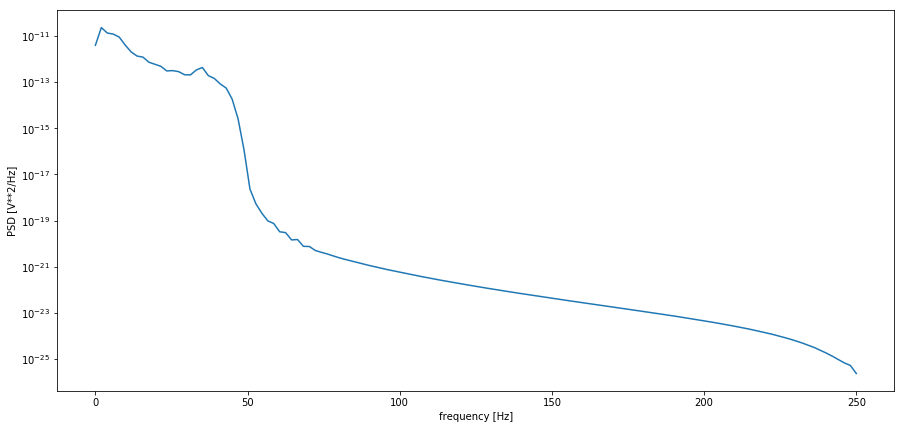

In [51]:
plt.figure(figsize=(15,7))
f, Pxx_den = signal.welch(data, fs=500)
plt.semilogy(f, Pxx_den[0,0,:])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()


### ploting of all trials for channel 0

(10, 18, 3000)


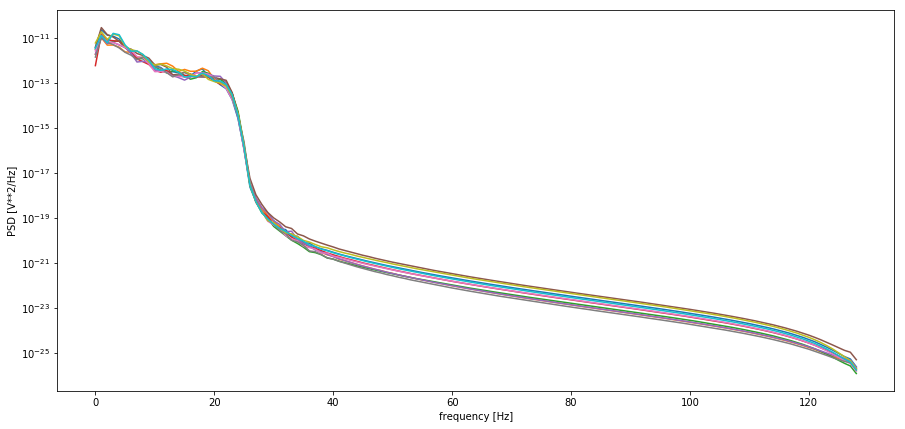

In [69]:
print(data.shape)
plt.figure(figsize=(15,7))
f, Pxx_den = signal.welch(data, fs=500)
plt.semilogy(Pxx_den[:,0,:].T)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()


### plotting of all channel for trial 0

(10, 18, 3000)


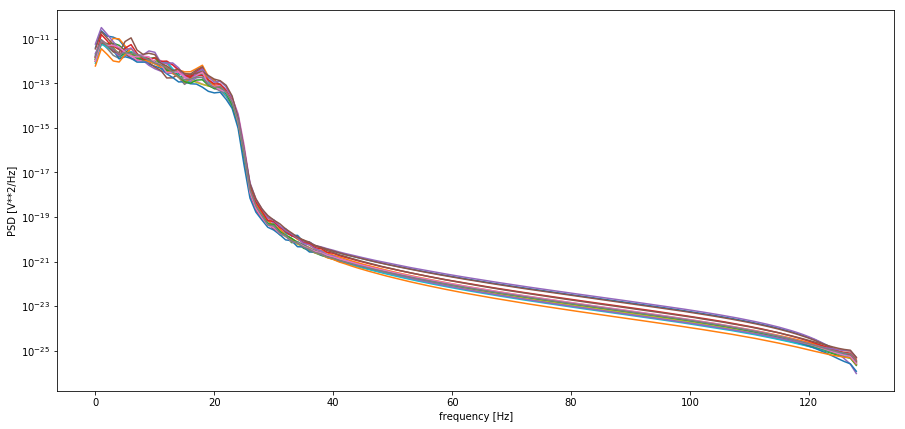

In [70]:
print(data.shape)
plt.figure(figsize=(15,7))
f, Pxx_den = signal.welch(data, fs=500)
plt.semilogy(Pxx_den[0,:,:].T)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()


# Welch without reshaped filtered data

In [36]:
data=np.load('D:/Datasets/EEG dataset/mental artithematic/preprocessed_data/subject_2/subject_2_{}.npy'.format(1)).T

In [37]:
data=mne.filter.filter_data(data, sfreq=500, l_freq=0.1, h_freq=40)
#data should be column into samples
print(data.shape)

Setting up band-pass filter from 0.1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 16501 samples (33.002 sec)

(18, 30000)


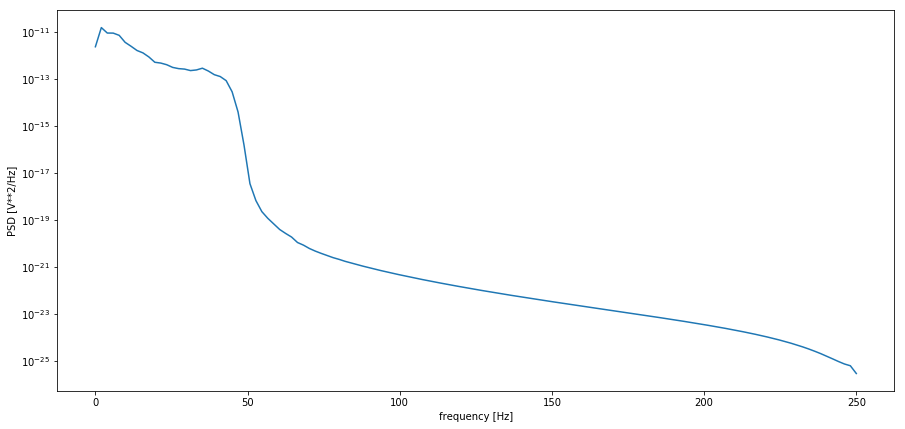

In [38]:
plt.figure(figsize=(15,7))
f, Pxx_den = signal.welch(data, fs=500)
plt.semilogy(f, Pxx_den[0])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()


# Welch wit epcohed filtered data

In [40]:
data=np.load('D:/Datasets/EEG dataset/mental artithematic/preprocessed_data/subject_2/subject_2_{}.npy'.format(1)).T
print(data.shape)

(18, 30000)


In [41]:
data=data.reshape(18,-1,3000)
data.shape

(18, 10, 3000)

In [43]:
data=np.swapaxes(data,0,1)
data.shape

(10, 18, 3000)

In [44]:
for i in range(data.shape[0]):
    data[i,:,:]=mne.filter.filter_data(data[i,:,:], sfreq=500, l_freq=0.1, h_freq=40)
#data should be column into samples
print(data.shape)

Setting up band-pass filter from 0.1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 16501 samples (33.002 sec)

Setting up band-pass filter from 0.1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00

<ipython-input-44-4e758f63b58a>:2: RuntimeWarning: filter_length (16501) is longer than the signal (3000), distortion is likely. Reduce filter length or filter a longer signal.
  data[i,:,:]=mne.filter.filter_data(data[i,:,:], sfreq=500, l_freq=0.1, h_freq=40)
<ipython-input-44-4e758f63b58a>:2: RuntimeWarning: filter_length (16501) is longer than the signal (3000), distortion is likely. Reduce filter length or filter a longer signal.
  data[i,:,:]=mne.filter.filter_data(data[i,:,:], sfreq=500, l_freq=0.1, h_freq=40)
<ipython-input-44-4e758f63b58a>:2: RuntimeWarning: filter_length (16501) is longer than the signal (3000), distortion is likely. Reduce filter length or filter a longer signal.
  data[i,:,:]=mne.filter.filter_data(data[i,:,:], sfreq=500, l_freq=0.1, h_freq=40)



Setting up band-pass filter from 0.1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 16501 samples (33.002 sec)

Setting up band-pass filter from 0.1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.0

<ipython-input-44-4e758f63b58a>:2: RuntimeWarning: filter_length (16501) is longer than the signal (3000), distortion is likely. Reduce filter length or filter a longer signal.
  data[i,:,:]=mne.filter.filter_data(data[i,:,:], sfreq=500, l_freq=0.1, h_freq=40)
<ipython-input-44-4e758f63b58a>:2: RuntimeWarning: filter_length (16501) is longer than the signal (3000), distortion is likely. Reduce filter length or filter a longer signal.
  data[i,:,:]=mne.filter.filter_data(data[i,:,:], sfreq=500, l_freq=0.1, h_freq=40)
<ipython-input-44-4e758f63b58a>:2: RuntimeWarning: filter_length (16501) is longer than the signal (3000), distortion is likely. Reduce filter length or filter a longer signal.
  data[i,:,:]=mne.filter.filter_data(data[i,:,:], sfreq=500, l_freq=0.1, h_freq=40)
<ipython-input-44-4e758f63b58a>:2: RuntimeWarning: filter_length (16501) is longer than the signal (3000), distortion is likely. Reduce filter length or filter a longer signal.
  data[i,:,:]=mne.filter.filter_data(dat

Setting up band-pass filter from 0.1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 16501 samples (33.002 sec)

Setting up band-pass filter from 0.1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00

<ipython-input-44-4e758f63b58a>:2: RuntimeWarning: filter_length (16501) is longer than the signal (3000), distortion is likely. Reduce filter length or filter a longer signal.
  data[i,:,:]=mne.filter.filter_data(data[i,:,:], sfreq=500, l_freq=0.1, h_freq=40)
<ipython-input-44-4e758f63b58a>:2: RuntimeWarning: filter_length (16501) is longer than the signal (3000), distortion is likely. Reduce filter length or filter a longer signal.
  data[i,:,:]=mne.filter.filter_data(data[i,:,:], sfreq=500, l_freq=0.1, h_freq=40)
<ipython-input-44-4e758f63b58a>:2: RuntimeWarning: filter_length (16501) is longer than the signal (3000), distortion is likely. Reduce filter length or filter a longer signal.
  data[i,:,:]=mne.filter.filter_data(data[i,:,:], sfreq=500, l_freq=0.1, h_freq=40)


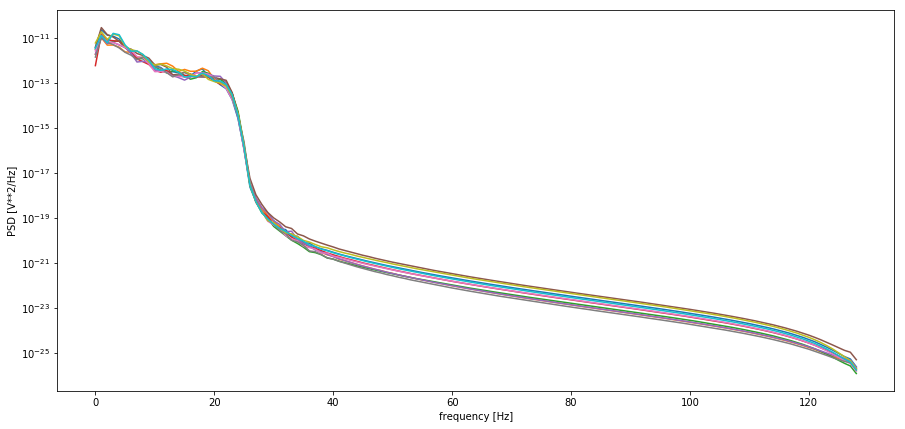

In [72]:
plt.figure(figsize=(15,7))
f, Pxx_den = signal.welch(data, fs=500)
plt.semilogy(f, Pxx_den[0,0,:])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()


# All above things with butterworth filter

In [73]:
data=np.load('D:/Datasets/EEG dataset/mental artithematic/preprocessed_data/subject_2/subject_2_{}.npy'.format(1)).T

In [88]:
from scipy import signal
nyq = 0.5 * 500
low = 0.1 / nyq
high = 40 / nyq
b, a = signal.butter(5, [low,high], 'band')


In [89]:
data=signal.filtfilt(b, a, data)  
#data should be column into samples
data=data.reshape(18,-1,3000)

In [90]:
data=np.swapaxes(data,0,1) #trials, channel, datapoints

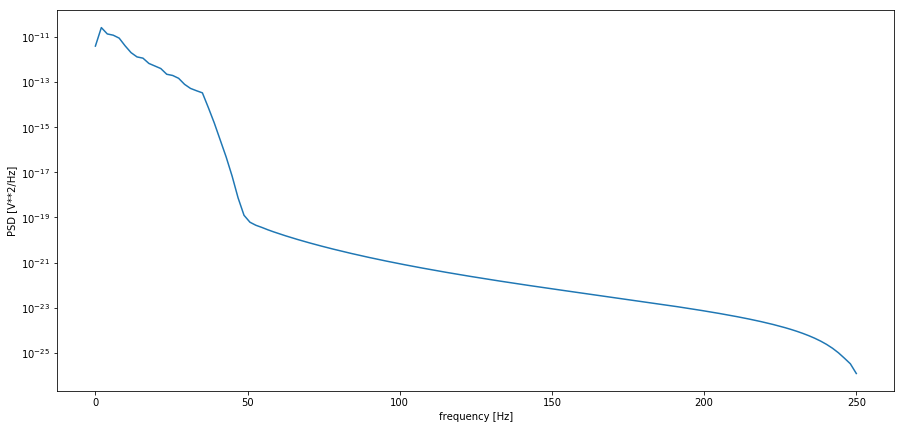

In [91]:
plt.figure(figsize=(15,7))
f, Pxx_den = signal.welch(data, fs=500)
plt.semilogy(f, Pxx_den[0,0,:])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()


### ploting of all trials for channel 0

(10, 18, 3000)


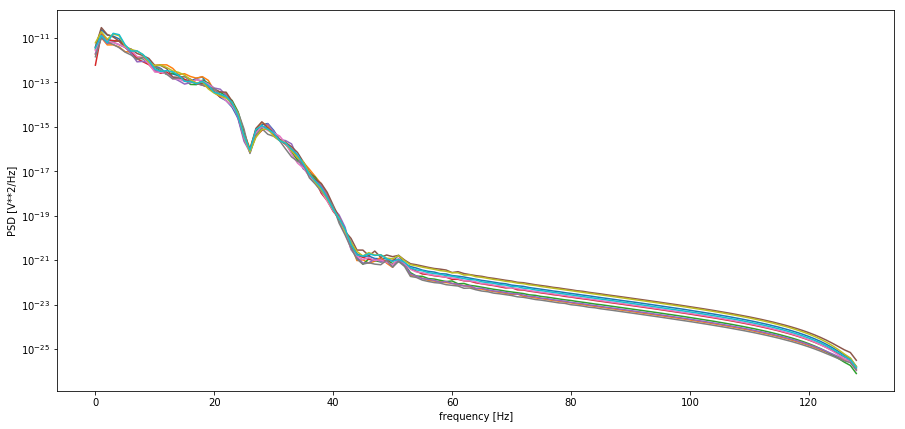

In [78]:
print(data.shape)
plt.figure(figsize=(15,7))
f, Pxx_den = signal.welch(data, fs=500)
plt.semilogy(Pxx_den[:,0,:].T)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()


### plotting of all channel for trial 0

(10, 18, 3000)


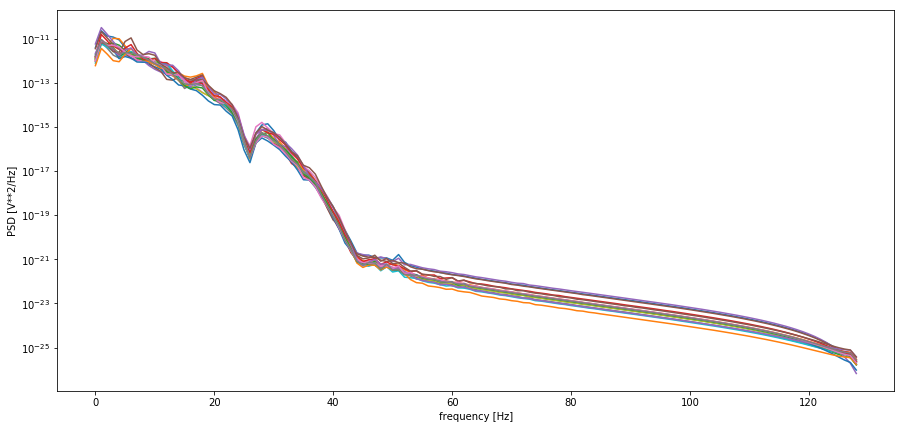

In [79]:
print(data.shape)
plt.figure(figsize=(15,7))
f, Pxx_den = signal.welch(data, fs=500)
plt.semilogy(Pxx_den[0,:,:].T)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()


# Bandpower

source: https://raphaelvallat.com/bandpower.html

In [186]:
data=np.load('D:/Datasets/EEG dataset/mental artithematic/preprocessed_data/subject_2/subject_2_{}.npy'.format(1)).T

data=mne.filter.filter_data(data, sfreq=500, l_freq=0.2, h_freq=40)
#data should be column into samples
print(data.shape)


Setting up band-pass filter from 0.2 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.20
- Lower transition bandwidth: 0.20 Hz (-6 dB cutoff frequency: 0.10 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 8251 samples (16.502 sec)

(18, 30000)


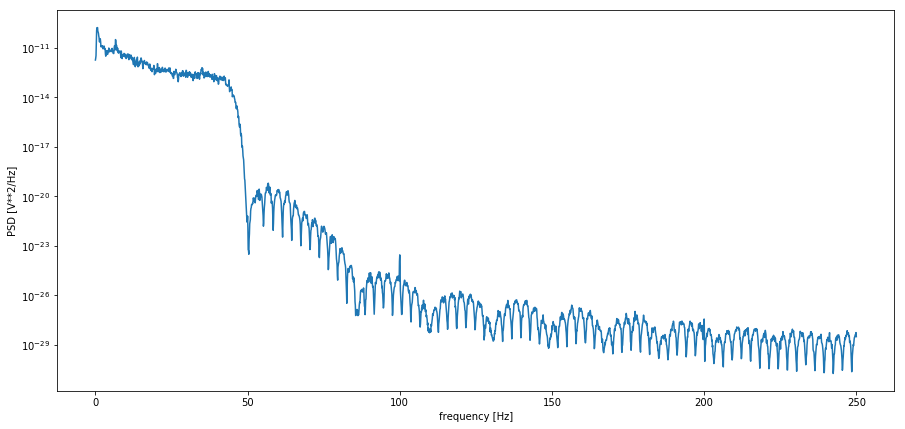

In [187]:
fs=500
#low freq =0.1
win = 2/0.2 * fs

plt.figure(figsize=(15,7))
f, Pxx_den = signal.welch(data,fs,nperseg=win )
plt.semilogy(f, Pxx_den[0])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()


### Butter worth

In [188]:
data=np.load('D:/Datasets/EEG dataset/mental artithematic/preprocessed_data/subject_2/subject_2_{}.npy'.format(1)).T


In [189]:
from scipy import signal
nyq = 0.5 * 500
l=0.3
low = l / nyq
high = 40 / nyq
b, a = signal.butter(4, [low,high], 'band')


In [190]:
data=signal.filtfilt(b, a, data)  
#data should be column into samples
#data=data.reshape(18,-1,3000)

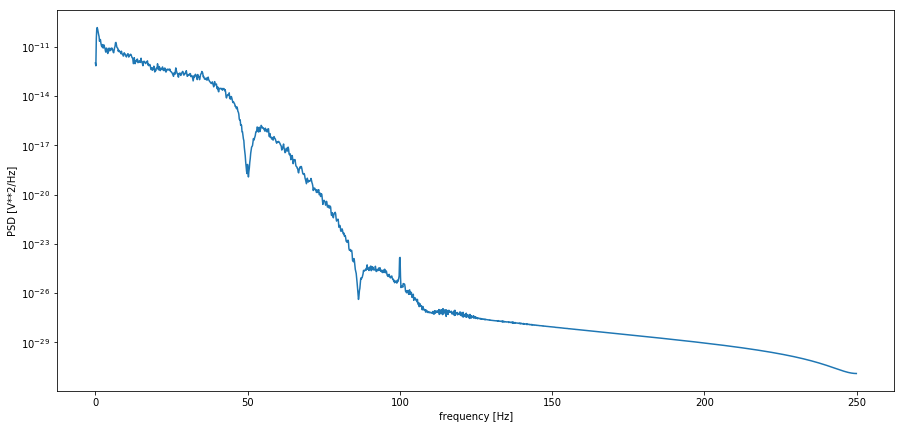

In [191]:
fs=500
#low freq =0.1
win = 2/l * fs

plt.figure(figsize=(15,7))
f, Pxx_den = signal.welch(data,fs,nperseg=win )
plt.semilogy(f, Pxx_den[0])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()


# applying fft on above singal

In [193]:
data=np.load('D:/Datasets/EEG dataset/mental artithematic/preprocessed_data/subject_2/subject_2_{}.npy'.format(1)).T
data.shape

(18, 30000)

In [194]:
from scipy import signal
nyq = 0.5 * 500
l=0.3
low = l / nyq
high = 40 / nyq
b, a = signal.butter(4, [low,high], 'band')


In [195]:
data=signal.filtfilt(b, a, data)  
#data should be column into samples
#data=data.reshape(18,-1,3000)

In [201]:
fft=np.absolute(np.fft.rfft(data))

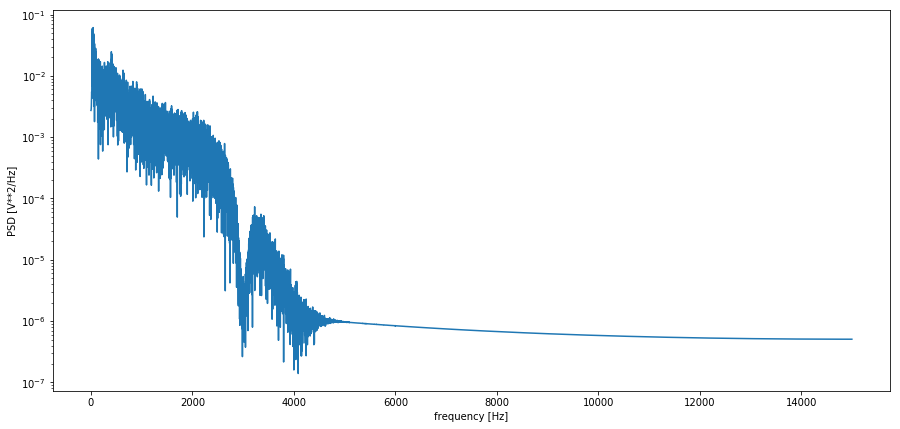

In [202]:
plt.figure(figsize=(15,7))
plt.semilogy(fft[0])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

# bandpower calculation

In [8]:
data=np.load('D:/Datasets/EEG dataset/mental artithematic/preprocessed_data/subject_2/subject_2_{}.npy'.format(1)).T


In [9]:
from scipy import signal
nyq = 0.5 * 500
l=0.3
low = l / nyq
high = 45 / nyq
b, a = signal.butter(4, [low,high], 'band')


In [10]:
data=signal.filtfilt(b, a, data)  
#data should be column into samples
#data=data.reshape(18,-1,3000)
data.shape

(18, 30000)

In [11]:
fs=500
#low freq =0.1
win = 2/l * fs

freq, Pxx_den = signal.welch(data,fs,nperseg=win )
Pxx_den.shape

(18, 1667)

In [19]:
# Define EEG bands
eeg_bands = {'Delta': (0, 4),
             'Theta': (4, 8),
             'Alpha': (8, 12),
             'Beta': (12, 30),
             'Gamma': (30, 45)}

# Take the mean of the fft amplitude for each EEG band
eeg_band_wlech = dict()
for band in eeg_bands:  
    freq_ix = np.where((freq >= eeg_bands[band][0]) & 
                       (freq <= eeg_bands[band][1]))[0]
    eeg_band_wlech[band] = np.mean(Pxx_den[:,freq_ix],axis=1)


In [20]:
li=list(eeg_band_wlech.values())

In [21]:
len(li)

5

In [24]:
li[3].shape

(18, 120)

In [234]:
np.concatenate(li).shape

(90,)

# band power calculation

In [248]:
from scipy.signal import welch
from scipy.integrate import simps
def bandpower(data, sf, band,  relative=True):


    band = np.asarray(band)
    low, high = band

    # Define window length

    nperseg = (2 / low) * sf

    # Compute the modified periodogram (Welch)
    freqs, psd = welch(data, sf, nperseg=nperseg)

    # Frequency resolution
    freq_res = freqs[1] - freqs[0]

    # Find closest indices of band in frequency vector
    idx_band = np.logical_and(freqs >= low, freqs <= high)

    # Integral approximation of the spectrum using Simpson's rule.
    bp = simps(psd[:,idx_band], dx=freq_res)

    if relative:
        bp /= simps(psd, dx=freq_res)
    return bp

In [249]:
data.shape

(18, 30000)

In [250]:
bandpower(data,500,band=[0.1,4]).shape

(18,)